<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/3_2%EA%B0%95_Logistic_Regression%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - binary_accuracy: 0.7458 - loss: 1.9316 - val_binary_accuracy: 1.0000 - val_loss: 1.9333e-04
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.8805 - loss: 0.5015 - val_binary_accuracy: 1.0000 - val_loss: 0.0012
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.6958 - loss: 0.9241 - val_binary_accuracy: 1.0000 - val_loss: 0.0039
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.8305 - loss: 0.3814 - val_binary_accuracy: 1.0000 - val_loss: 0.0090
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.8122 - loss: 0.3260 - val_binary_accuracy: 1.0000 - val_loss: 0.0158
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.8725 - loss: 0.2700 - val_binary_accuracy: 1.0000 - val_loss: 0.0225
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.7092 - loss: 0.4760 - val_binary_accuracy: 1.0000 - val_loss: 0.0280
Epoc

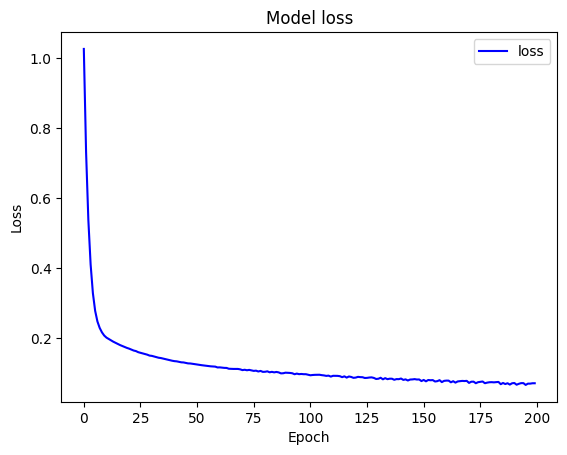

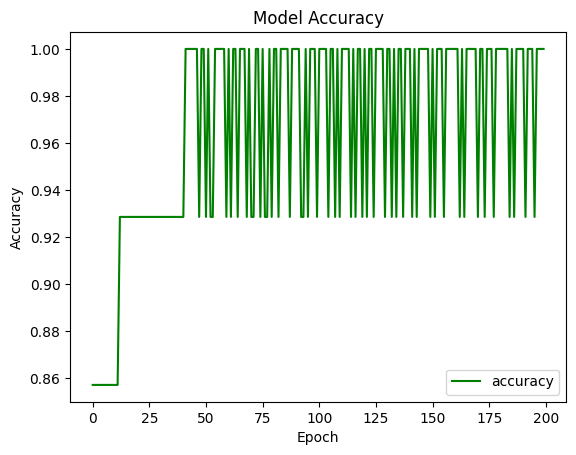

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
line_x [-40.   -39.99 -39.98 ...  19.97  19.98  19.99]
line_y [[2.8866303e-21]
 [2.9169379e-21]
 [2.9475864e-21]
 ...
 [9.9999976e-01]
 [9.9999982e-01]
 [9.9999982e-01]]


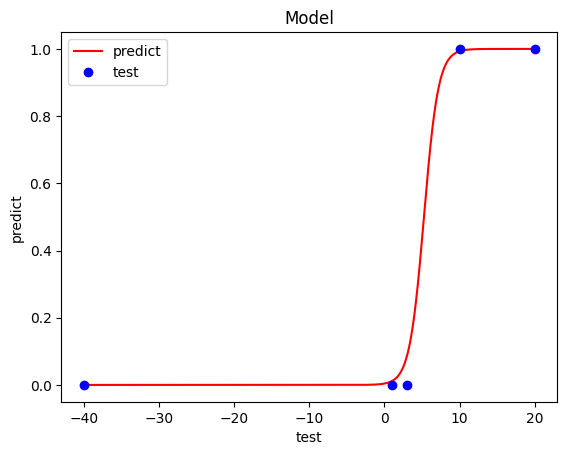

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[0.99752593]
 [0.99999994]
 [1.        ]
 [1.        ]
 [1.        ]]


In [1]:
# 단순한 로지스틱 회귀 예제 (텐서플로우2)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# x(입력), y(결과) 데이터
x_train = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50,
                    -15, 1, 3, -7, 2.5,
                    7, 77, 33, 52, 80])
y_train = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
                    0, 0, 0, 0, 0,
                    1, 1, 1, 1, 1])

"""
train 데이터와 test 데이터로 분리 (80:20)
train_test_split은 머신러닝 모델을 학습할 때 데이터를 학습용(train)과 테스트용(test)으로 나누는 과정 또는 함수입니다.
train_test_split 함수는 일반적으로 Scikit-learn 라이브러리에서 제공되며, 사용법은 다음과 같습니다

주요 매개변수:
X: 특징(features) 데이터.
y: 타겟(target) 또는 레이블 데이터.
test_size: 테스트 데이터의 비율 (예: 0.2는 20%).
random_state: 데이터 분할 시 결과를 재현하기 위한 랜덤 시드.
"""
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=77)

# keras의 다차원 계층 모델인 Sequential를 레이어를 만든다.
model = tf.keras.models.Sequential()
# 입력이 1차원이고 출력이 1차원임을 뜻함 - Dense는 레이어의 종류
model.add(tf.keras.layers.Dense(5, input_dim=1))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 종합
model.summary()

# Optimizer: Stochastic gradient descent (확률적 경사 하강법)
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

# Loss function: binary_crossentropy (이진 교차 엔트로피)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.
#validation_split=0.2: 학습 데이터의 20%를 검증 데이터로 사용합니다. 학습 중 모델 성능을 검증하기 위해 학습 데이터를 나누어 사용합니다.
hist = model.fit(x_train, y_train, batch_size=1, epochs=200, validation_split=0.2)

# 모델 손실 함수 시각화
"""
- hist.history['loss']: 모델이 학습하는 동안 에포크마다 기록된 손실 값입니다.
  이는 model.fit() 호출 시 반환되는 hist 객체의 history 딕셔너리에서 가져온 값으로,
  각 에포크에서 손실 함수의 값을 나타냅니다.
- 'b-': 파란색(b) 선(-)으로 그래프를 그린다는 의미입니다.
  여기서 b는 blue(파란색)을 의미하고, -는 선 스타일을 나타냅니다.
- label='loss': 그래프의 범례(legend)에 표시될 레이블로, 이 선이 손실 함수(loss)를 나타낸다는 것을 알립니다.
"""
plt.plot(hist.history['loss'], 'b-', label='loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 정확도 시각화
"""
- hist.history['binary_accuracy']는 모델 학습 중 이진 분류 정확도(binary_accuracy)가 에포크마다 기록된 값을 저장하는 리스트입니다.
이 값은 모델이 에포크마다 얼마나 정확하게 이진 분류 작업을 수행했는지를 나타냅니다.
binary_accuracy는 예측 값이 실제 라벨과 얼마나 일치하는지를 계산하는 지표로,
예측값이 0 또는 1로 분류될 때 사용하는 정확도 메트릭입니다.
"""
plt.plot(hist.history['binary_accuracy'], 'g-', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실 함수 계산
model.evaluate(x_test, y_test, batch_size=1, verbose=0)


# 모델 시각화
line_x = np.arange(min(x_test), max(x_test), 0.01)
line_y = model.predict(line_x)

print("line_x", line_x)
print("line_y", line_y)


plt.plot(line_x, line_y, 'r-')
plt.plot(x_test, y_test, 'bo')
plt.title('Model')
plt.xlabel('test')
plt.ylabel('predict')
plt.legend(['predict', 'test'], loc='upper left')
plt.show()

# 모델 테스트
#print(model.predict([1, 2, 3, 4, 5]))
#print(model.predict([11.0, 21.0, 31.0, 41.0, 500.0]))

# 예측할 데이터의 1차원 배열을 2차원 배열로 변환 (예: [11, 21, 31, 41, 500] -> [[11], [21], [31], [41], [500]])
"""
이렇게 하는 이유는 대부분의 딥러닝 모델이 2차원 입력을 기대하기 때문입니다.
텐서플로우 모델의 predict() 메서드는 입력 데이터를 2차원 배열로 받아들이기 때문에,
예측을 수행하기 전에 배열을 올바른 차원으로 변환하는 과정이 필요합니다.
"""
test_input = np.array([11, 21, 31, 41, 500]).reshape(-1, 1)

# 모델 예측
predictions = model.predict(test_input)

# 예측 결과 출력
print(predictions)
